<a href="https://colab.research.google.com/github/shanjay-GS/Data-Science/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling (1).csv


In [13]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [14]:
print("Shape:", df.shape)
display(df.head())

Shape: (5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [16]:
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
print("Negative experience values:", df[df['Experience'] < 0].shape[0])
df['Experience'] = np.where(df['Experience'] < 0, df['Experience'].median(), df['Experience'])

Negative experience values: 52


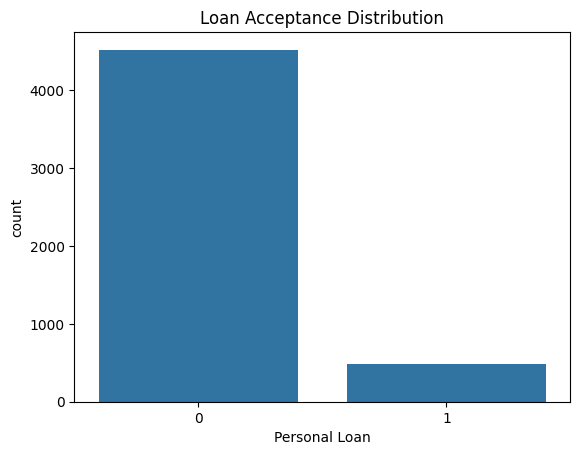

In [17]:
sns.countplot(x='Personal Loan', data=df)
plt.title("Loan Acceptance Distribution")
plt.show()

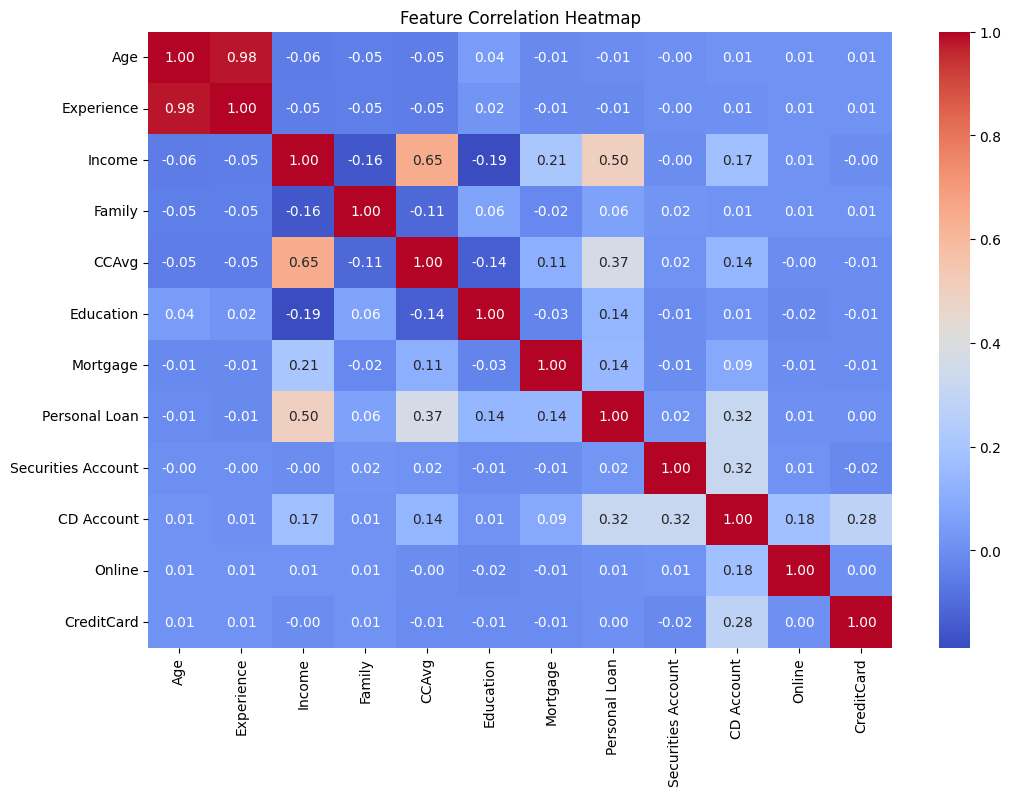

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
models = {
    "Logistic Regression": LogisticRegression(),
}


for name, model in models.items():
    print(f"\n Model: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))



 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.66      0.73        96

    accuracy                           0.95      1000
   macro avg       0.90      0.82      0.85      1000
weighted avg       0.95      0.95      0.95      1000

ROC-AUC: 0.9635301438053097


In [33]:
models = {
    "Logistic Regression": LogisticRegression(),
}


for name, model in models.items():
    print(f"\n Model: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))



 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       904
           1       0.83      0.66      0.73        96

    accuracy                           0.95      1000
   macro avg       0.90      0.82      0.85      1000
weighted avg       0.95      0.95      0.95      1000

